#### Mutual Information 
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances 

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y)<b>
Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [4]:
# Import the Pandas library
import pandas as pd

# Read the 'housing_data.csv' file into a Pandas DataFrame
housing_df = pd.read_csv('housing_data.csv')

# Display the first five rows of the DataFrame
housing_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display information about the DataFrame
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Check for null values in the DataFrame
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Create a list of numeric data types
numeric_lst = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Get a list of numerical columns in the DataFrame
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [8]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [10]:
# Get the number of numerical columns in the DataFrame
len(numerical_cols)

38

In [11]:
# Select only the numerical columns from the DataFrame
housing_df = housing_df[numerical_cols]

In [12]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
# Drop the 'Id' column from the DataFrame
housing_df = housing_df.drop("Id", axis=1)

In [14]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    housing_df.drop(labels=['SalePrice'], axis=1),  # features
    housing_df['SalePrice'],  # target
    test_size=0.3,  # 30% of the data will be used for test set
    random_state=0)  # fix the random state for reproducibility


In [15]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [16]:
# Check for null values in the training set
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [26]:
# Import the mutual_info_regression function from scikit-learn
from sklearn.feature_selection import mutual_info_regression

# Determine the mutual information between the features and target
mutual_info = mutual_info_regression(X_train.fillna(0), y_train) #X_train.fillna(0)-> Replace null values with 0
mutual_info

array([0.25769478, 0.20928281, 0.1664159 , 0.52615415, 0.11381784,
       0.3480904 , 0.24686174, 0.09583825, 0.16418224, 0.01015921,
       0.11215261, 0.38505884, 0.31259216, 0.22477603, 0.        ,
       0.4803761 , 0.01951728, 0.        , 0.27538154, 0.08401636,
       0.06382668, 0.01304991, 0.19054673, 0.18800637, 0.26920089,
       0.37458849, 0.36807773, 0.06446088, 0.16391146, 0.01788588,
       0.00141539, 0.01694779, 0.01040794, 0.00969232, 0.        ,
       0.00343936])

In [28]:
# Convert the mutual information array to a Pandas Series
mutual_info = pd.Series(mutual_info)

# Set the index of the Series to be the column names of the training set
mutual_info.index = X_train.columns

# Sort the Series in descending order
mutual_info.sort_values(ascending=False)

OverallQual      0.542092
GrLivArea        0.480492
TotalBsmtSF      0.383792
GarageCars       0.372685
GarageArea       0.367444
YearBuilt        0.346876
1stFlrSF         0.312899
FullBath         0.273675
MSSubClass       0.266001
GarageYrBlt      0.265977
YearRemodAdd     0.254311
2ndFlrSF         0.227888
LotFrontage      0.207007
Fireplaces       0.182962
TotRmsAbvGrd     0.182400
LotArea          0.166780
OpenPorchSF      0.166119
BsmtFinSF1       0.158711
OverallCond      0.113964
BsmtUnfSF        0.113259
MasVnrArea       0.095954
HalfBath         0.067205
WoodDeckSF       0.065476
BedroomAbvGr     0.054569
KitchenAbvGr     0.031190
ScreenPorch      0.019603
BsmtFullBath     0.012643
PoolArea         0.011541
EnclosedPorch    0.011458
YrSold           0.004623
BsmtFinSF2       0.001703
LowQualFinSF     0.000774
MiscVal          0.000319
3SsnPorch        0.000000
BsmtHalfBath     0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot: >

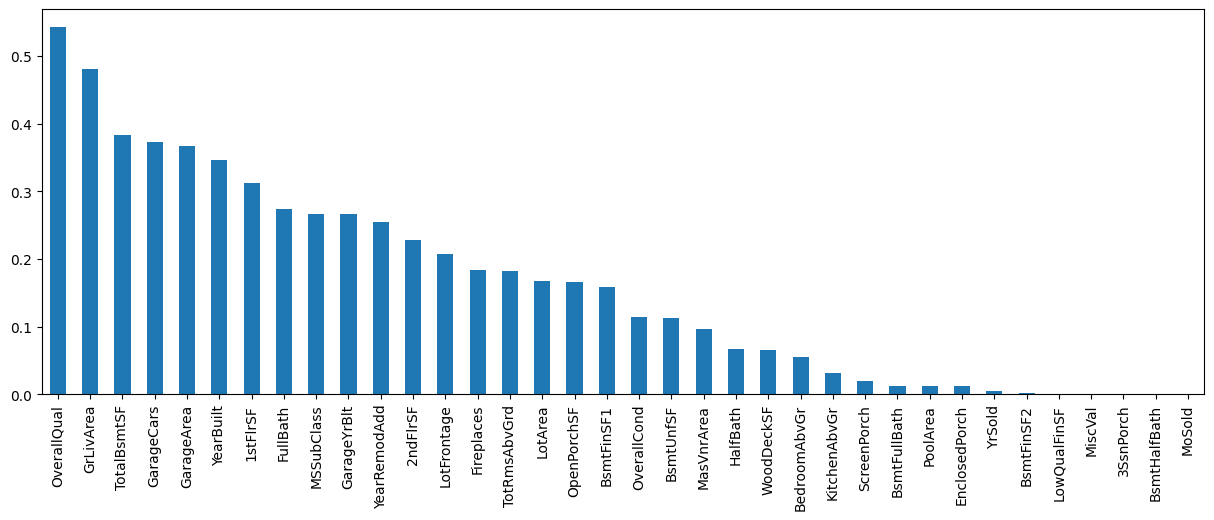

In [29]:
# Plot the mutual information values as a bar plot
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 5))

In [30]:
# Import the SelectPercentile function from scikit-learn
from sklearn.feature_selection import SelectPercentile

This code imports the SelectPercentile function from scikit-learn. The SelectPercentile function is a feature selection method that selects a specified percentage of the most important features based on a scoring function. It can be useful for reducing the dimensionality of the data and improving the performance of machine learning models.

To use the SelectPercentile function, you will need to specify a scoring function and a percentile value. The scoring function is used to evaluate the importance of each feature, and the percentile value determines the number of features that will be selected. For example, if you specify a percentile value of 50, the SelectPercentile function will select the 50% of the features that score highest according to the scoring function.

In [31]:
# Create a SelectPercentile object with a percentile value of 20
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)

# Fit the object to the training data, replacing null values with 0
selected_top_columns.fit(X_train.fillna(0), y_train)

# This code creates a SelectPercentile object and uses the mutual_info_regression function as the scoring function. 
# The percentile parameter is set to 20, 
# which means that the SelectPercentile object will select the top 20% of the features based on their mutual information values.

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000022C81463760>)

In [32]:
# Get a boolean array indicating which features were selected
selected_top_columns.get_support()

# This code calls the get_support() method on the selected_top_columns object to get a boolean array indicating which features were selected. 
# The array will have a length equal to the number of features in the training set, 
# and each element will be True if the corresponding feature was selected and False if it was not.

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [33]:
# Get the names of the selected columns
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

#### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)


As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.